# Computer Vision: Part 3

# Feature detection to Face detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir = '../'

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

# Edge Detection

**Edge detection** means identifying points in an image where the brightness changes sharply or discontinuously. We can draw line segments with those points, which are called **edges**. 

**Canny detection** is another type of edge detection techniques. It's one of the most popular algorithms for detecting edges, which is performed in four steps: ***Noise reduction, Finding gradient and its direction, Non-maximum suppression*** and ***hysteresis thresholding***.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img1.png?raw=true)



(-0.5, 699.5, 536.5, -0.5)

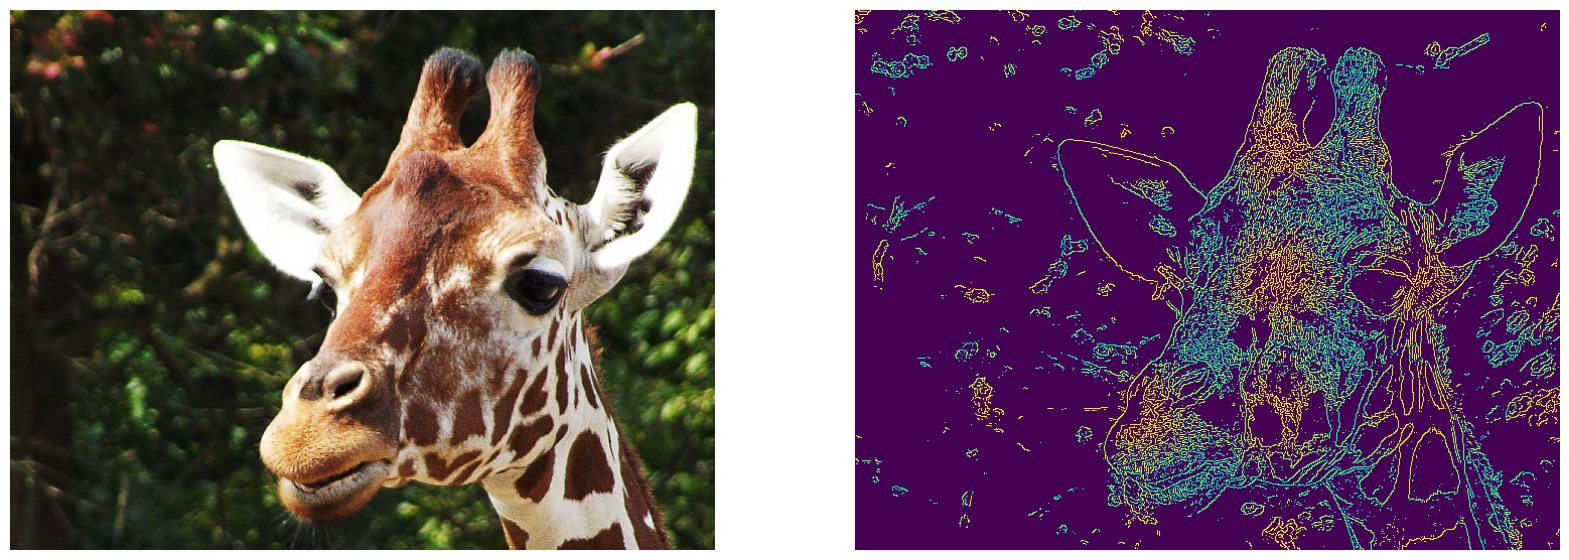

In [3]:
img = cv2.imread(dir + 'images/giraffe.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Canny detection without blurring
edges = cv2.Canny(img, threshold1=127, threshold2=127)

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges)
plt.axis('off')

In [4]:
# Set the lower and upper threshold
med_val = np.median(img)

lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))
print("Lower: {}, Upper: {}".format(lower, upper))

Lower: 27, Upper: 50


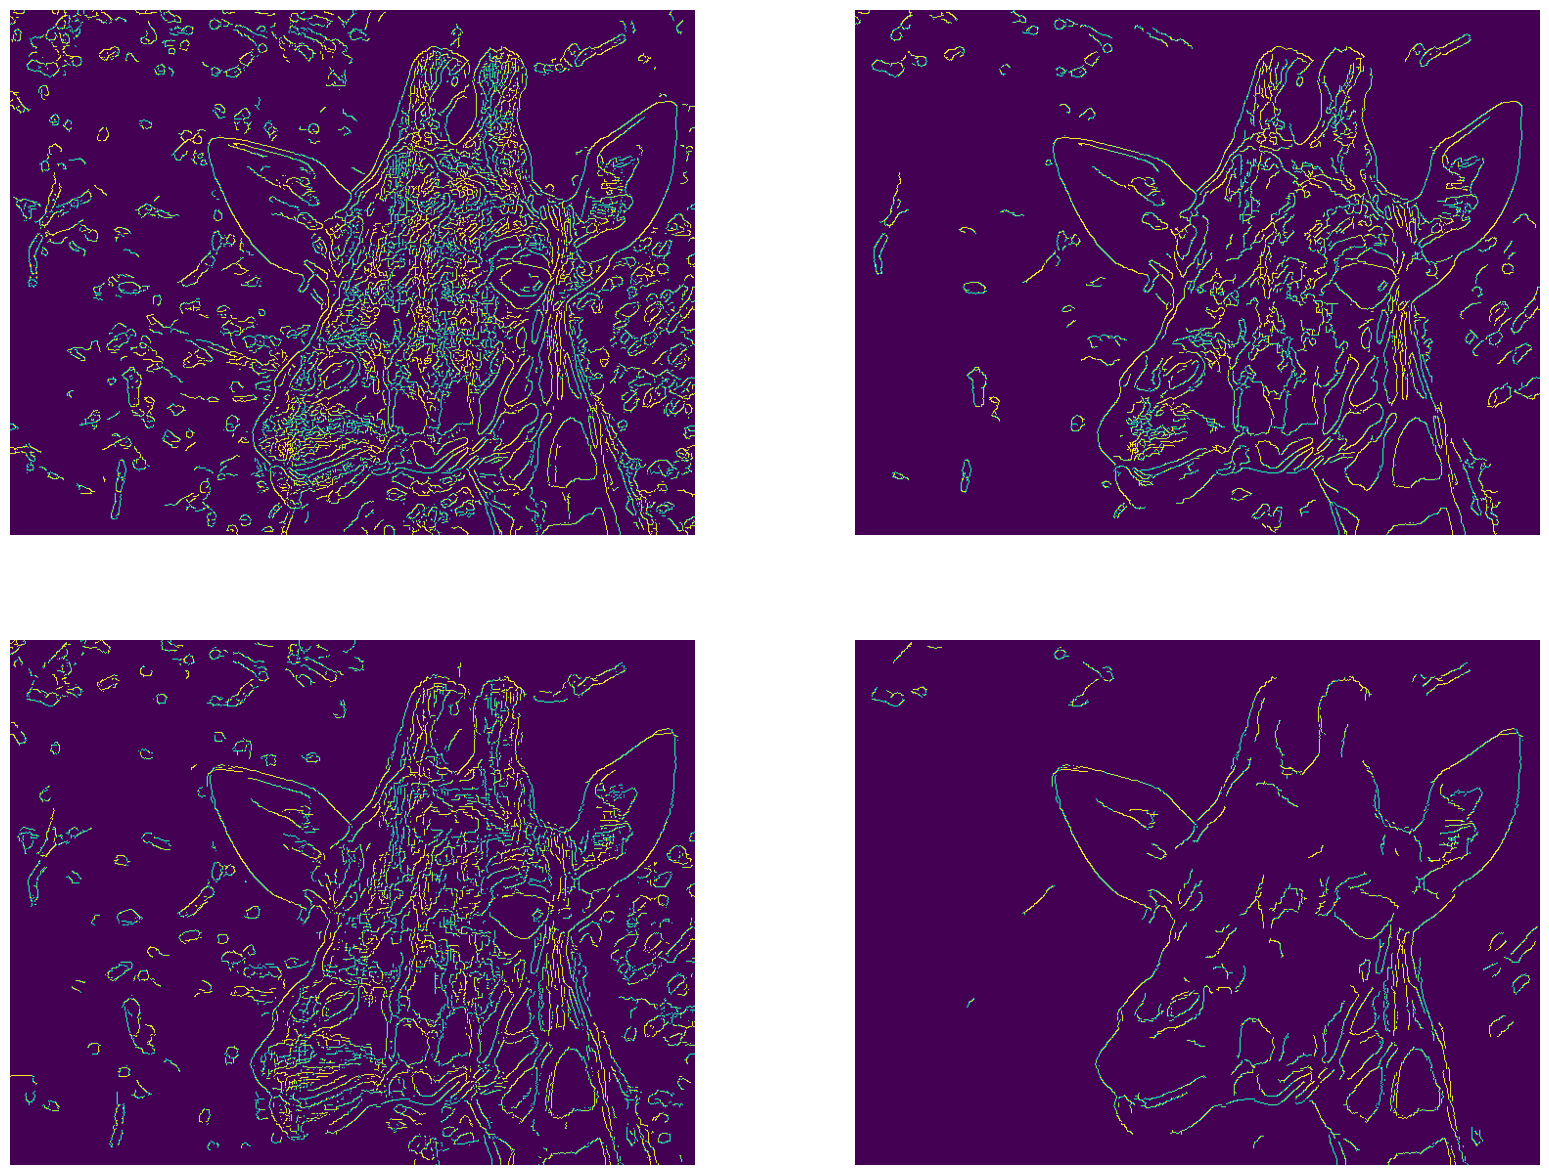

In [5]:
# Blurring with ksize = 5 
img_k5 = cv2.blur(img, ksize = (5, 5))

# Canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper)
edges_k5_2 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper+100)

# Blurring with ksize = 9 
img_k9 = cv2.blur(img, ksize = (9, 9))

# Canny detection with different thresholds
edges_k9 = cv2.Canny(img_k9, threshold1 = lower, threshold2 = upper)
edges_k9_2 = cv2.Canny(img_k9, threshold1 = lower, threshold2 = upper+100)

# Plot the images
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

# Contour Detection

Corner detection is another detection algorithm which is widely used in object detection, motion detection, video tracking and so on. 
Actually we have way of making things more efficient, which are ***Harris corner detection*** and ***Shi & Tomasi corner detection***.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img2.png?raw=tru)

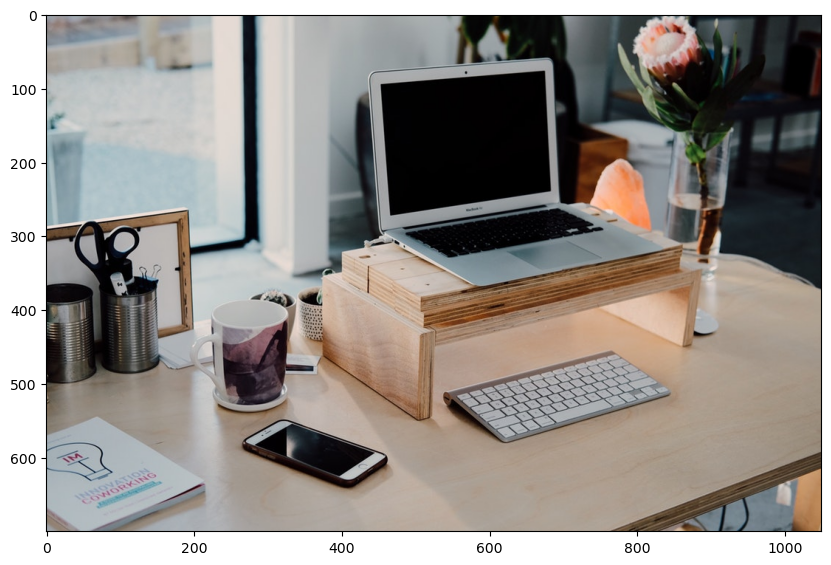

In [6]:
img = cv2.imread(dir + 'images/desk.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

In [7]:
# Convert the image into grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Change into float 
# img_gray = np.float32(img_gray)

(-0.5, 1049.5, 699.5, -0.5)

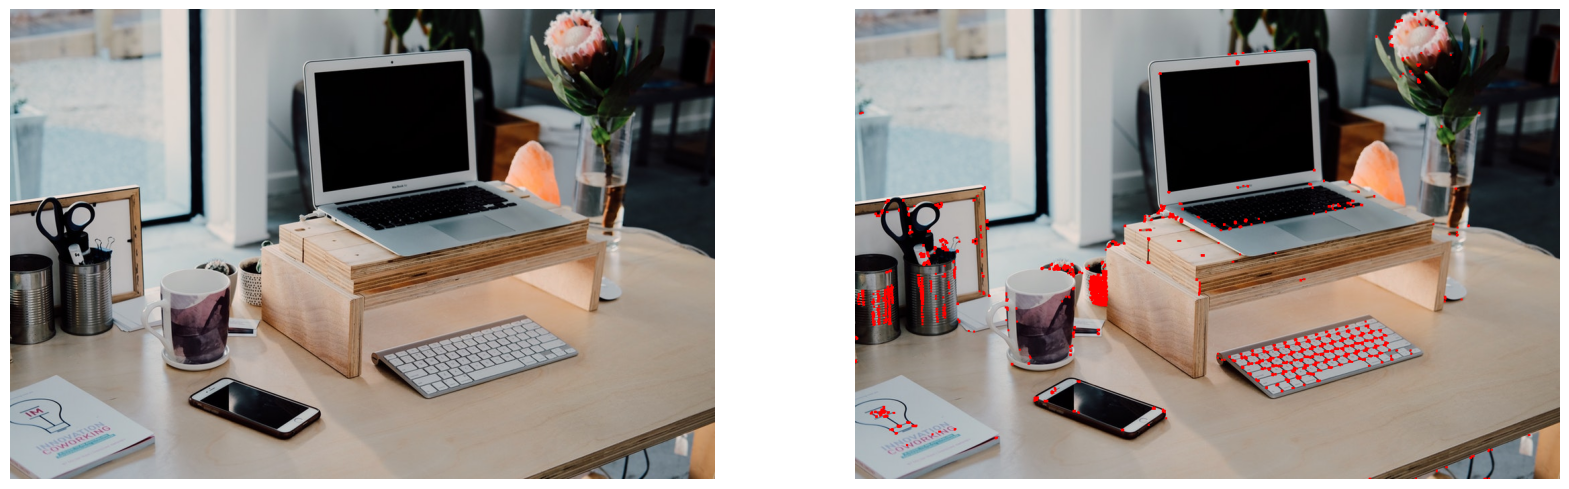

In [8]:
# Apply Harris corner detection
dst = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = .04)

# Dilate the detected corners
dst = cv2.dilate(dst, None)

# Spot the detected corners
img_2 = img.copy()
img_2[dst>0.01*dst.max()]=[255,0,0]

# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

C:\Users\AJANTHA\AppData\Local\Temp\ipykernel_25100\1409960343.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


(-0.5, 1049.5, 699.5, -0.5)

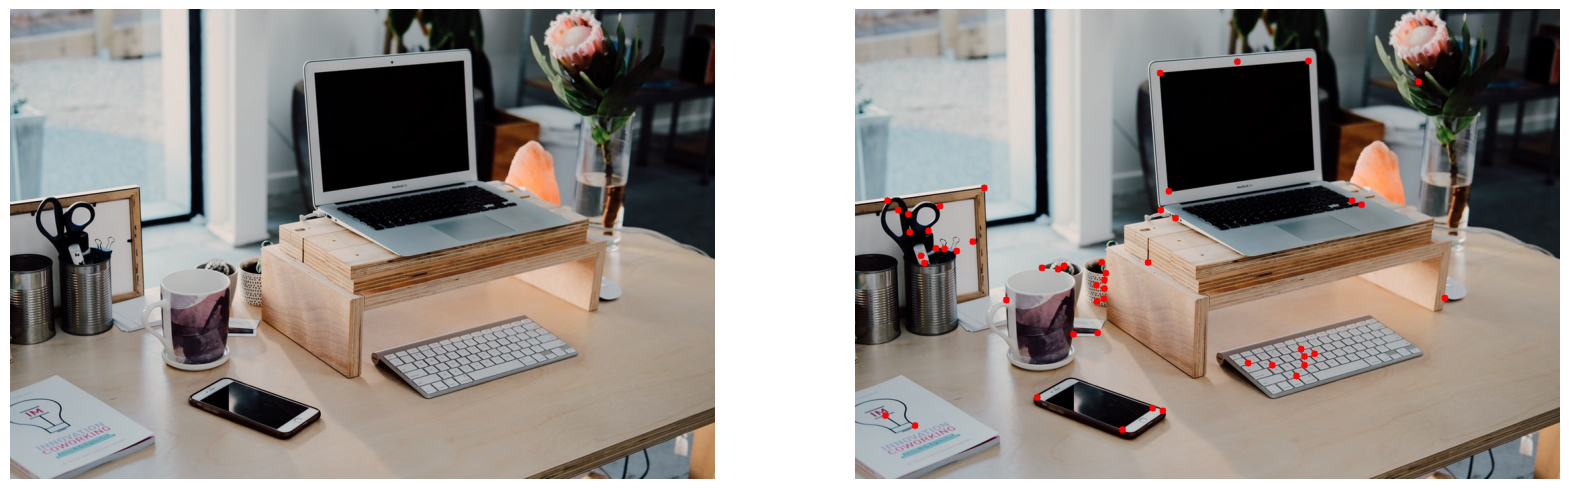

In [9]:
# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners = 50, 
                                  qualityLevel = 0.01, 
                                  minDistance = 10)
corners = np.int0(corners)

# Spot the detected corners
img_2 = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center = (x,y), radius = 5, 
               color = 255, thickness = -1)

# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

# Face Detection

## Where's our hero?

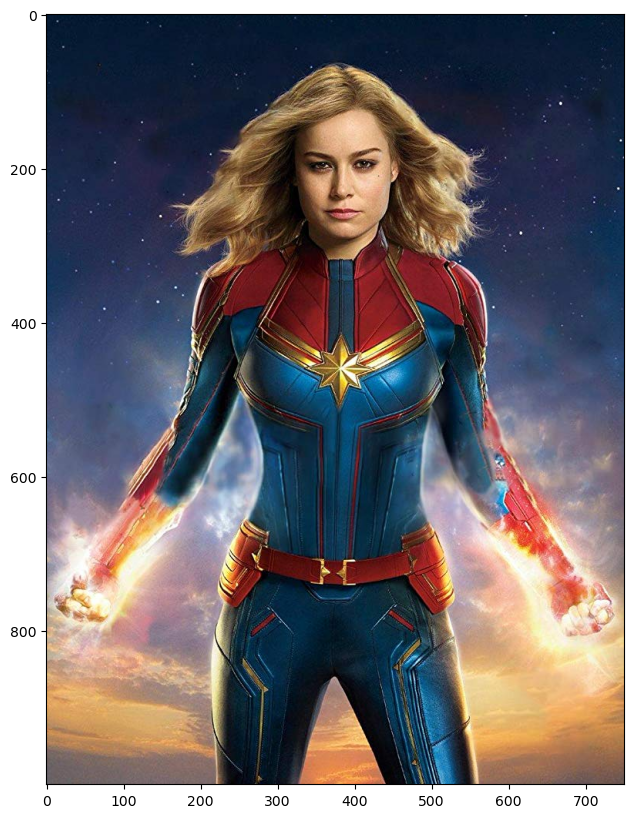

In [10]:
cap_mavl = cv2.imread(dir + 'images/captin_marvel.jpg')
cap_mavl = cv2.cvtColor(cap_mavl, cv2.COLOR_BGR2RGB) 
display(cap_mavl)

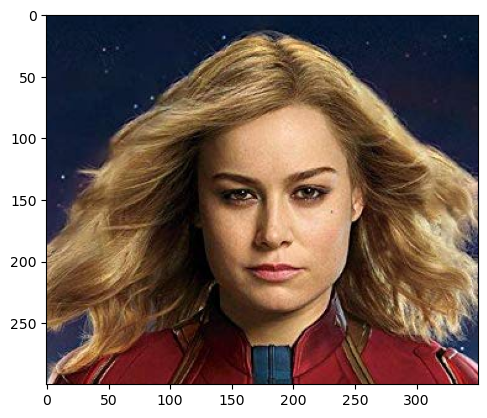

In [11]:
# Find the resion of interest
roi = cap_mavl[50:350, 200:550]
plt.imshow(roi)

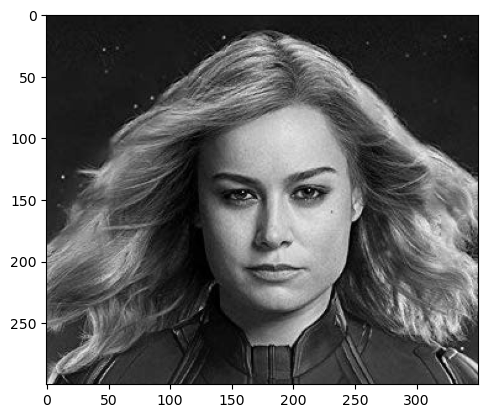

In [12]:
# Convert the roi to grayscale
roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
plt.imshow(roi, cmap = 'gray')

In [13]:
# Load Cascade filter 
face_cascade = cv2.CascadeClassifier('C:/Users/AJANTHA/Downloads/Work at Home/New folder/vision_4_beginners-master/haarcascades/haarcascade_frontalface_default.xml')

In [14]:
# Create a function drawing a rectangle around the detected face 
def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy, scaleFactor = 1.1, minNeighbors = 3)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy

(-0.5, 349.5, 299.5, -0.5)

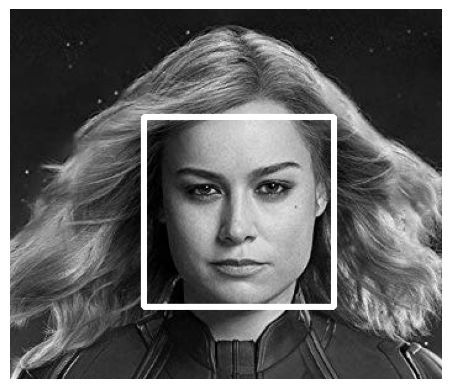

In [15]:
# Detect the face 
roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap = 'gray')
plt.axis('off')


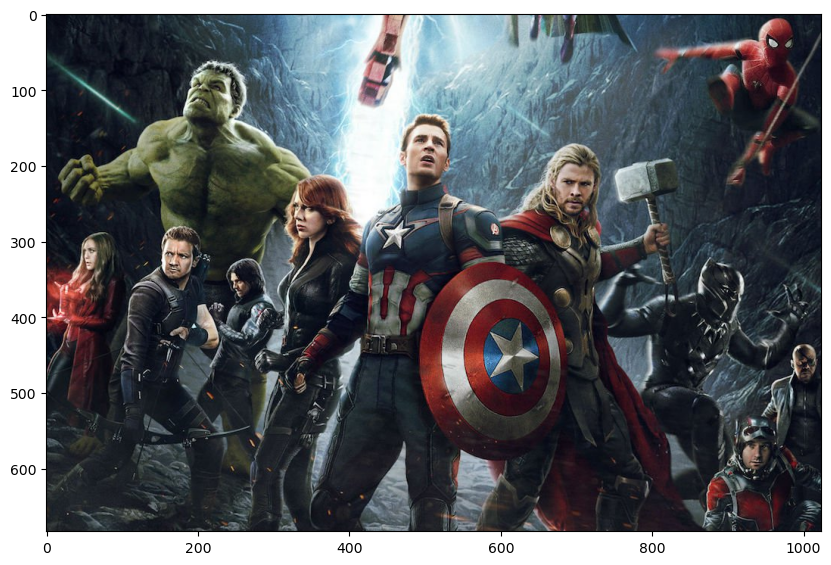

In [16]:
avengers = cv2.imread(dir + 'images/avengers.jpg')
avengers = cv2.cvtColor(avengers, cv2.COLOR_BGR2RGB)
display(avengers)

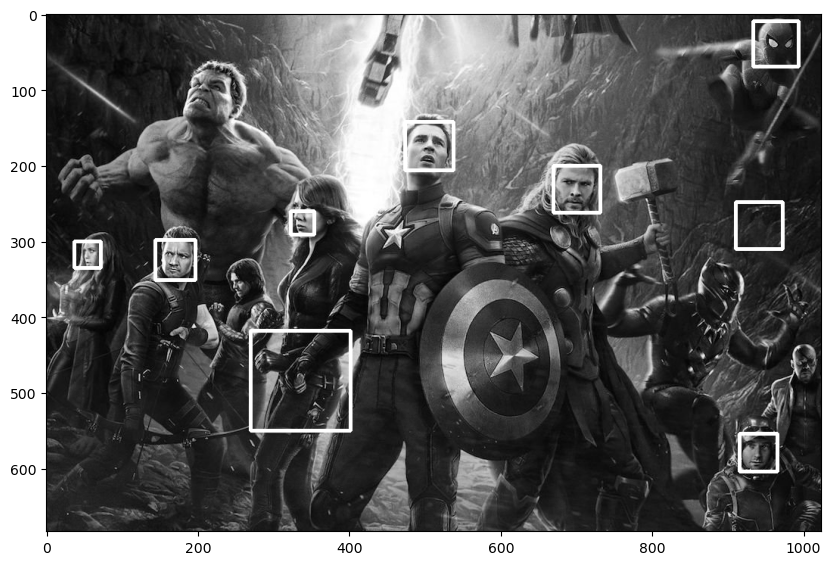

In [17]:
avengers = cv2.cvtColor(avengers, cv2.COLOR_RGB2GRAY)
detected_avengers = detect_face(avengers)
display(detected_avengers, cmap = 'gray')

# Want to try yours?

Would you like to try yours with a Webcam? We can apply the same process. Save the following code scrip as a file and import it on your terminal. If you're to use Jupyter notebook, put the codes in one cell and execute. You can shut down the window by pressing ESC.

In [20]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()